In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_nifti(file_path):
    # Load the NIfTI image
    nii_image = nib.load(file_path)

    # Access the image data as a Numpy array
    data_array = nii_image.get_fdata()

    return data_array

def show_nifti(file_data, slice=20):
    plt.imshow(file_data[:, :, slice], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('NIfTI Image')
    plt.colorbar()
    plt.show()

def show_label_seg_nifti(label, seg, slice=20):
    plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.imshow(label[:, :, slice], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('Label Image')
    plt.colorbar()
    # plt.show()

    plt.subplot(1, 2, 2)
    plt.imshow(seg[:, :, slice], cmap='gray')  # Display a single slice (change the slice index as needed)
    plt.title('Segmentation Image')
    plt.colorbar()
    plt.show()


def dice_coefficient(mask1, mask2):
    # Ensure the masks have the same shape
    if mask1.shape != mask2.shape:
        raise ValueError("Input masks must have the same shape.")

    # Compute the intersection and union of the masks
    intersection = np.sum(mask1 * mask2)
    union = np.sum(mask1) + np.sum(mask2)

    # Calculate the Dice coefficient
    dice = (2.0 * intersection) / (union + 1e-8)  # Add a small epsilon to avoid division by zero

    return dice


subject:  1
Tissue and labels shapes:  (240, 240, 48) (240, 240, 48)
Dice Score: 0.769257966539888


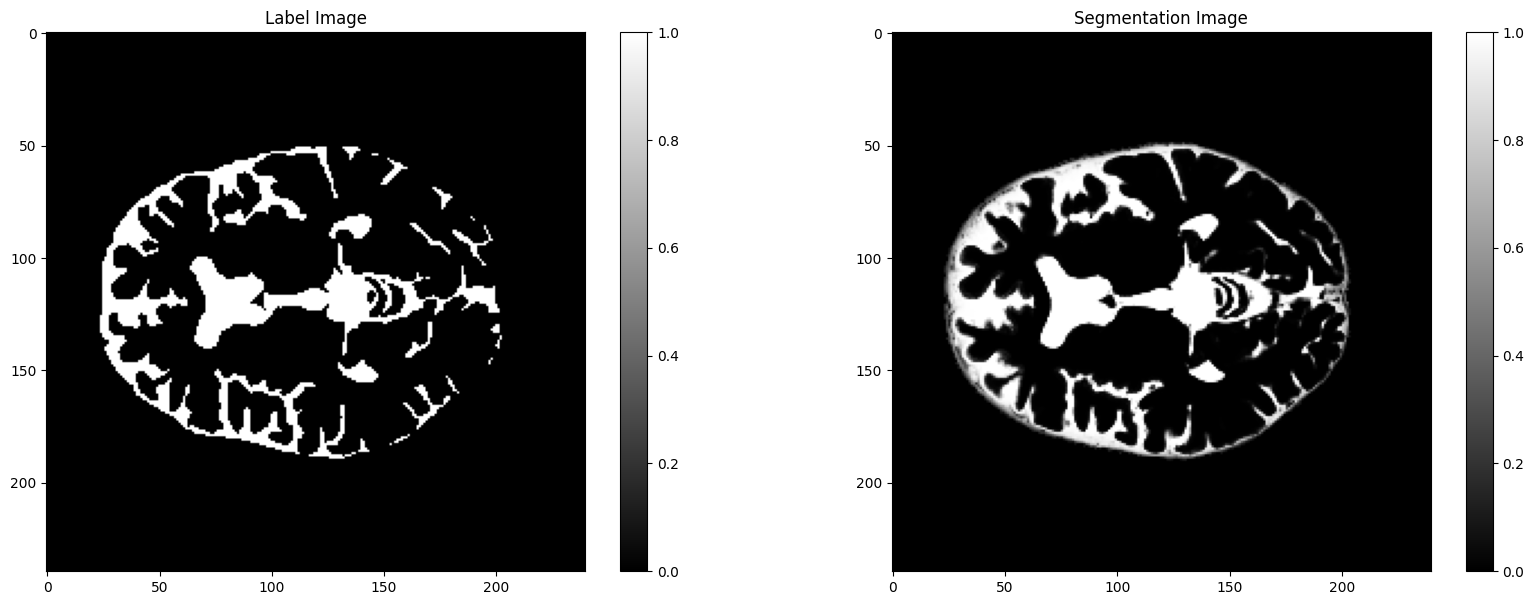

subject:  2
Tissue and labels shapes:  (240, 240, 48) (240, 240, 48)
Dice Score: 0.7222484746415774


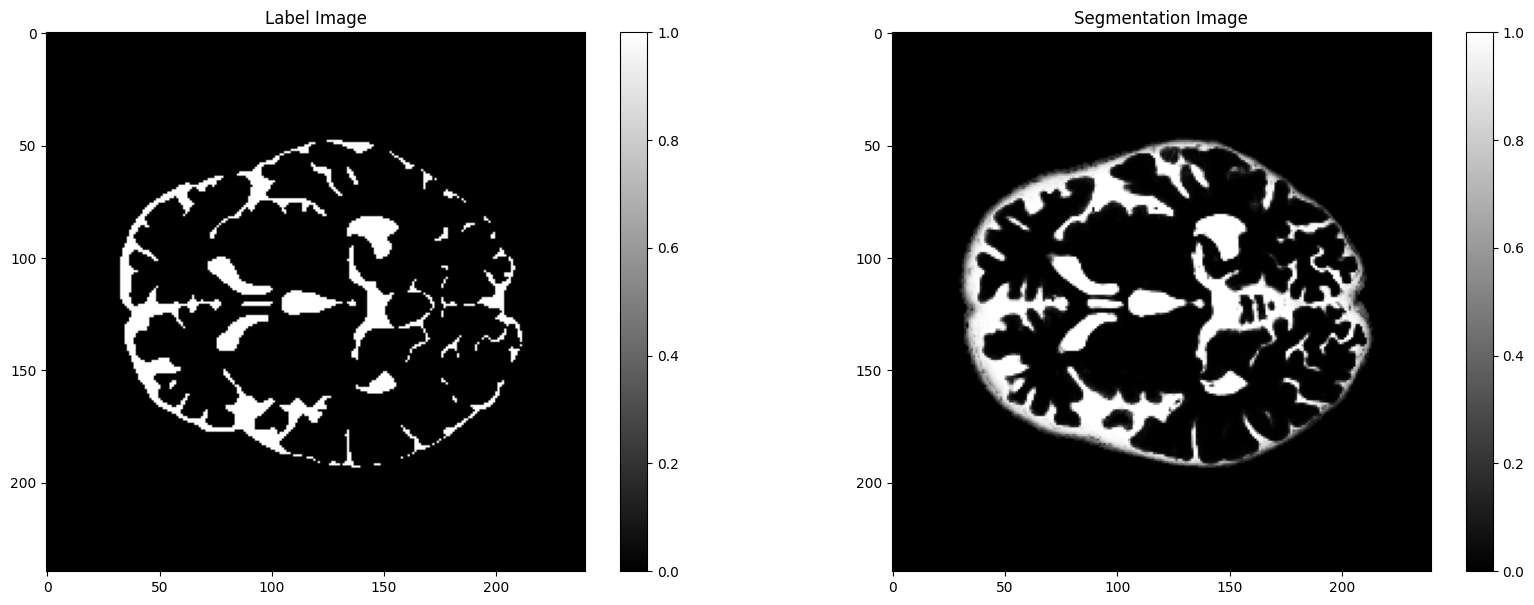

subject:  3
Tissue and labels shapes:  (240, 240, 48) (240, 240, 48)
Dice Score: 0.7443444618532189


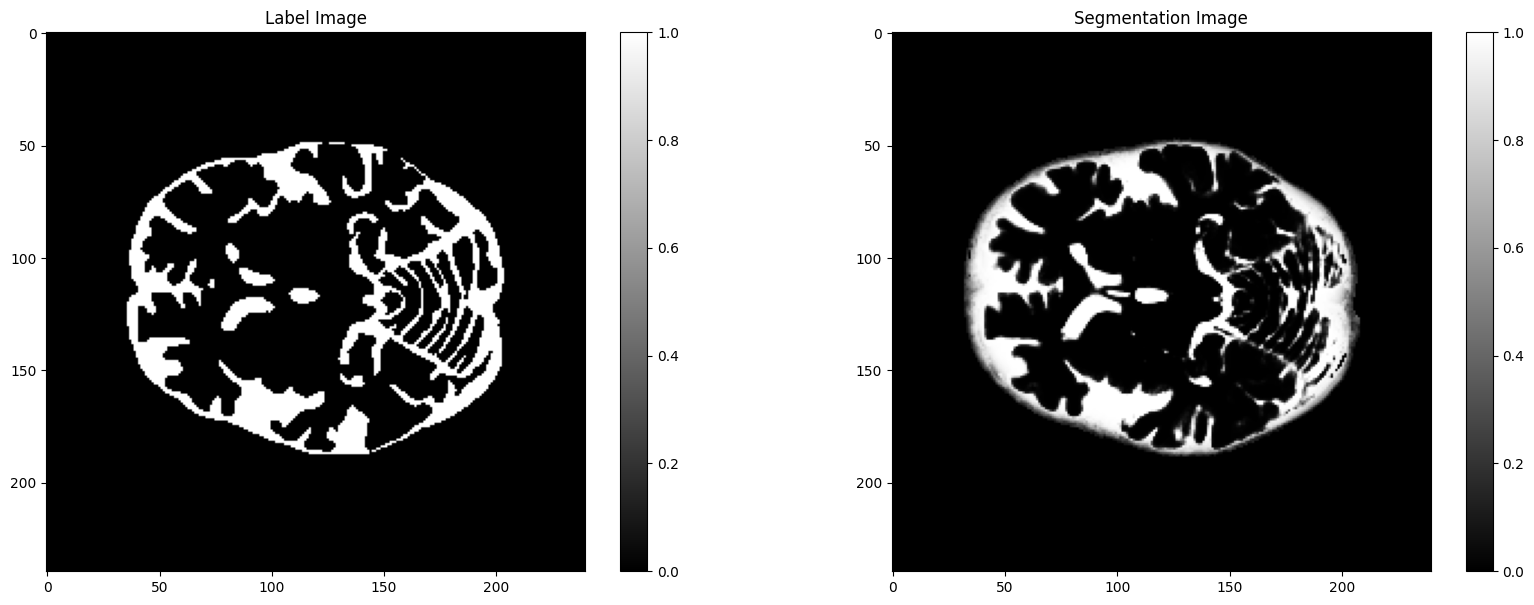

subject:  4
Tissue and labels shapes:  (240, 240, 48) (240, 240, 48)
Dice Score: 0.7661477015467766


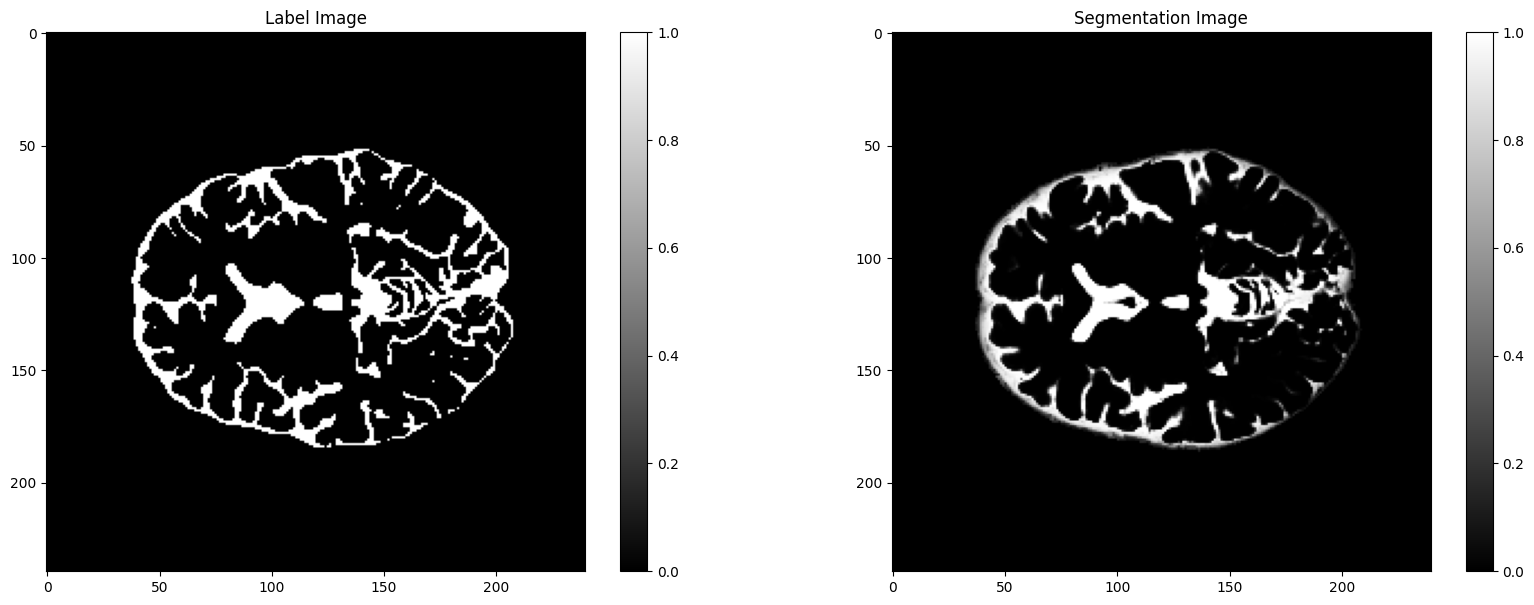

subject:  5
Tissue and labels shapes:  (240, 240, 48) (240, 240, 48)
Dice Score: 0.6983298040564304


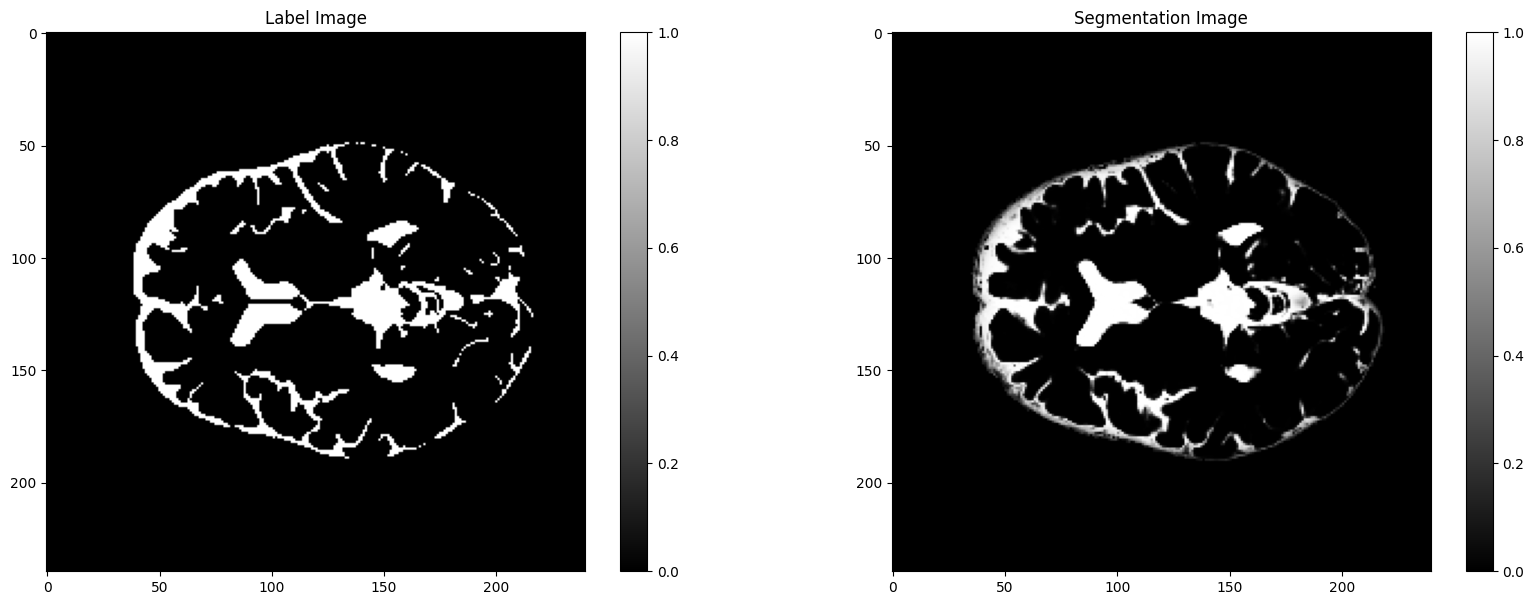

In [3]:

parameter_folder    = 'results_60_0.0001'

# c1  = GM , c2 = WM , c3 = CSF
tissue_file         = 'c3T1.nii'

test_label_file     = 'LabelsForTesting.nii'

for i in range(1,6):
    print("subject: ", i)
    subject             = str(i)
    
    tissue_path         = os.path.join('../P2_data/', subject, parameter_folder, tissue_file)
    labels_path         = os.path.join('../P2_data/', subject, test_label_file)

    tissue = load_nifti(tissue_path)
    labels = load_nifti(labels_path)

    # CSF = 1  , GM = 2  , WM = 3
    labels_CSF = labels == 1
    labels_GM  = labels == 2
    labels_WM  = labels == 3

    dice_score = dice_coefficient(labels_CSF, tissue)

    print("Tissue and labels shapes: " , tissue.shape, labels.shape)
    print("Dice Score:", dice_score)

    # Visualizing the label mask and segmentation
    show_label_seg_nifti(label=labels_CSF, seg=tissue)




Merging Nifti Files

In [20]:
# c1  = GM , c2 = WM , c3 = CSF
# Define the paths to the tissue segmentation files
c1_tissue_file = 'c1T1.nii'
c2_tissue_file = 'c2T1.nii'
c3_tissue_file = 'c3T1.nii'

subject = str(5)
parameter_folder = 'results_60_0.0001'

c1_seg_path = os.path.join('../P2_data/', subject, parameter_folder, c1_tissue_file)
c2_seg_path = os.path.join('../P2_data/', subject, parameter_folder, c2_tissue_file)
c3_seg_path = os.path.join('../P2_data/', subject, parameter_folder, c3_tissue_file)

# List of NIfTI file paths to be merged
file_paths = [c1_seg_path, c2_seg_path, c3_seg_path]

# Load one of the files to use as a template
template_img = nib.load(file_paths[0])

# Initialize an empty 3D array to store the merged labels
merged_labels = np.zeros(template_img.shape, dtype=np.uint8)

# Iterate through the file paths and merge the labels
for i, file_path in enumerate(file_paths):
    img = nib.load(file_path)
    merged_labels[img.get_fdata() > 0] = i + 1  # Assign labels 1, 2, 3 for GM, WM, CSF respectively

# Create a new NIfTI image with the merged labels
merged_img = nib.Nifti1Image(merged_labels, template_img.affine)

# Save the merged NIfTI image
output_path = os.path.join('../P2_data/', subject, parameter_folder, f"merged_segmentation_{subject}.nii")
nib.save(merged_img, output_path)
